<a href="https://colab.research.google.com/github/morrea1/MANE-4962/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alex Morreale HW 6 66202409


## Question 1

In [1]:
# Part A
##########
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#load data
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target variable
feature_names = wine.feature_names  # Feature names

#standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca
pca = PCA(n_components=2)  # We want the first two principal components
X_pca = pca.fit_transform(X_scaled)

# add to data fram
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y  # Add the target variable for visualization if needed

# Part B
#########################

explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for the first two components
print(f"Explained variance ratio of the first two principal components: {explained_variance_ratio}")

# Access individual ratios if needed
print(f"Explained variance ratio of PC1: {explained_variance_ratio[0]}")
print(f"Explained variance ratio of PC2: {explained_variance_ratio[1]}")

#Calculate the total variance explained by the first two principal components
total_variance = sum(explained_variance_ratio)

print(f"Total variance explained by the first two principal components: {total_variance}")


Explained variance ratio of the first two principal components: [0.36198848 0.1920749 ]
Explained variance ratio of PC1: 0.3619884809992633
Explained variance ratio of PC2: 0.1920749025700893
Total variance explained by the first two principal components: 0.5540633835693526


In [4]:
# Part C
##################################

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


from sklearn.metrics import classification_report


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca[['PC1', 'PC2']], df_pca['target'], test_size=0.4, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1)  # You can choose different kernels and tune hyperparameters like 'C'

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy of the SVM classifier: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.96      0.96      0.96        27
           2       1.00      1.00      1.00        19

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



In [5]:
# Part D
########################

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  # Use original features 'X'

# SVM Classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X_train, y_train)
tree_predictions = tree_classifier.predict(X_test)

# Evaluate SVM Classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

# Evaluate Decision Tree Classifier
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_report = classification_report(y_test, tree_predictions)

# Print the results
print("SVM Classifier:")
print(f"Accuracy: {svm_accuracy}")
print(svm_report)

print("\nDecision Tree Classifier:")
print(f"Accuracy: {tree_accuracy}")
print(tree_report)


SVM Classifier:
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.85      0.92        27
           2       1.00      1.00      1.00        19

    accuracy                           0.94        72
   macro avg       0.96      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72


Decision Tree Classifier:
Accuracy: 0.9305555555555556
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.84      1.00      0.92        27
           2       1.00      0.95      0.97        19

    accuracy                           0.93        72
   macro avg       0.95      0.93      0.93        72
weighted avg       0.94      0.93      0.93        72



Part D Comparison: SVM clasffifier did slighlty better by all metrics

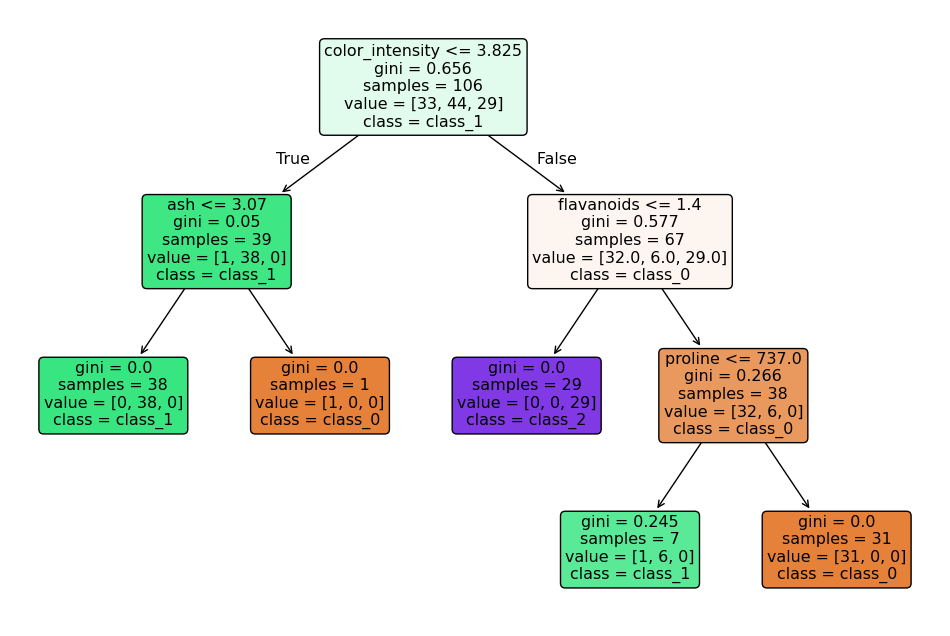

In [6]:
# Part E
#########################

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plot_tree(tree_classifier, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)
plt.show()

## Question 2

In [7]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X = X.reshape(X.shape[0], -1)  # Reshape to 2D array (number of samples, number of features)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_classifier.fit(X, y.ravel())  # Ravel y to make it 1D

RandomForestClassifier(random_state=42)

In [12]:
feature_importances = rf_classifier.feature_importances_ # feature importance

image_shape = (32, 32, 3)  # CIFAR-10 image shape
feature_importances_image = feature_importances.reshape(image_shape)

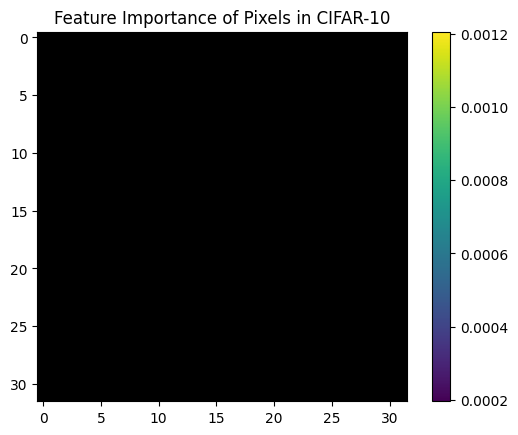

In [13]:
import matplotlib.pyplot as plt

#plot it

# Display the feature importances image
plt.imshow(feature_importances_image)
plt.title("Feature Importance of Pixels in CIFAR-10")
plt.colorbar()  # Add a colorbar to show the scale of importance
plt.show()

## Question 3

In [15]:
import pandas as pd
from google.colab import drive

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/surface_temp.npy'
surface_temp = np.load(file_path)

#data preprocessing
# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
surface_temp = scaler.fit_transform(surface_temp.reshape(-1, 1))

# Create the training dataset
# Use a sequence length of 50 (you can adjust this)
sequence_length = 50
X, y = [], []
for i in range(sequence_length, len(surface_temp) - 1):
    X.append(surface_temp[i - sequence_length:i, 0])
    y.append(surface_temp[i, 0])
X, y = np.array(X), np.array(y)

# Reshape the input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# RNN model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# train
model.fit(X, y, epochs=100, batch_size=32)  # You can adjust epochs and batch size

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.1893
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0355
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0278
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0347
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0312
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0244
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0310
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0306
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0267
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0240
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0286
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0244
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0247
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0226
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - lo

In [18]:
# Get the last sequence of data for prediction
inputs = surface_temp[-sequence_length:]
inputs = inputs.reshape(1, sequence_length, 1)

# Predict the next 10 timesteps
predicted_temp = []
for i in range(10):
    prediction = model.predict(inputs)
    predicted_temp.append(prediction[0, 0])
    inputs = np.append(inputs[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to get the actual temperature values
predicted_temp = scaler.inverse_transform(np.array(predicted_temp).reshape(-1, 1))

for i, temp in enumerate(predicted_temp):
    print(f"Predicted Temperature at Time {i + 1}: {temp[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Temperature at Time 1: 370.6304626464844
Predicted Temperature at Time 2: 372.3670654296875
Predicted Temperature at Time 3: 373.7615966796875
Predicted Temperature at Time 4: 373.9401550292969
Predicted Temperature at Time 5: 373.121826171875
Predicted Temperature at Time 6: 372.8017272949219
Predicted Temperature at Time 7: 373.2337341308594
Predicted Temperature at Time 8: 373.8166809082031
Predicted Temperature at Time 9: 373.7622375488281
Predicted Temperature at Time 10: 373.1974792480469
